## Setup

In [1]:
# importing libraries
import numpy             as np
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from scipy import stats


import random as rand # random number generation
import pandas as pd # data science essentials


# New! (may need to be downloaded)
import gender_guesser.detector as gender # guess gender based on (given) name

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# setting random seed
rand.seed(a = 327)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
meals = pd.read_excel(io = file)

# displaying the first rows of the DataFrame
meals.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


### Data Cleaning

In [2]:
# column names
print(meals.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [3]:
# converting column names to first letter cap only
col_lst = []

for col in meals.columns:
    col_lst.append(col.capitalize())
    
meals.columns = col_lst

In [4]:
#Renaming the mislabelled column LARGEST_ORDER_SIZE to AVG_MEAL_ORDERED

meals.rename(columns={'Largest_order_size':'Avg_meal_ordered'}, inplace=True)


## Feature Engineering

### Developing Flag Based Feature Engineering

In [5]:
# dummy variable for viewing a photo and attending master classes.
meals['has_Total_photos_viewed']   = 0
meals['has_Master_classes_attended'] = 0
meals['has_cancellations_before_noon'] = 0
meals['has_cancellations_after_noon'] = 0
meals['has_Late_delivery'] = 0
meals['has_Early_delivery'] = 0

for index, value in meals.iterrows():
    
    # Total_photos_viewed
    if meals.loc[index, 'Total_photos_viewed'] > 0:
        meals.loc[index, 'has_Total_photos_viewed'] = 1


    # Master_classes_attended
    if meals.loc[index, 'Master_classes_attended'] > 0:
        meals.loc[index, 'has_Master_classes_attended'] = 1
    
    # Cancellations_before_noon
    if meals.loc[index, 'Cancellations_before_noon'] > 0:
        meals.loc[index, 'has_cancellations_before_noon'] = 1
        
    # Cancellations_after_noon
    if meals.loc[index, 'Cancellations_after_noon'] > 0:
        meals.loc[index, 'has_cancellations_after_noon'] = 1
    
    # Late_delivery
    if meals.loc[index, 'Late_deliveries'] > 0:
        meals.loc[index, 'has_Late_delivery'] = 1
    
    # Early_delivery
    if meals.loc[index, 'Early_deliveries'] > 0:
        meals.loc[index, 'has_Early_delivery'] = 1
        
        

In [6]:
# one hot encoding categorical variables
one_hot_Median_meal_rating   = pd.get_dummies(meals['Median_meal_rating'])


# dropping categorical variables after they've been encoded
meals = meals.drop('Median_meal_rating', axis = 1)


# joining codings together
meals = meals.join([one_hot_Median_meal_rating])


# saving new columns
new_columns = meals.columns


In [7]:
#Creating outlier flags
# dummy variable for contacting customer service more than 10 times
meals['more_contacts_with_cust_service'] = 0

for index, value in meals.iterrows():
    
    
    if meals.loc[index, 'Contacts_w_customer_service'] > 10:
        meals.loc[index, 'more_contacts_with_cust_service'] = 1
        

# dummy variable for subscribing to more than one weekly plan
meals['more_weekly_plan'] = 0

for index, value in meals.iterrows():
    
    
    if meals.loc[index, 'Weekly_plan'] > 1:
        meals.loc[index, 'more_weekly_plan'] = 1




In [8]:
meals['Outliers'] = 0

# If the z-value of a variable in a column is greater than 3, it is flagged as an outlier

for index, value in meals[(np.abs(stats.zscore(meals['Total_meals_ordered'])) > 3)].iterrows():
    meals.loc[index,'Outliers'] = 1

for index, value in meals[(np.abs(stats.zscore(meals['Avg_prep_vid_time'])) > 3)].iterrows():
    meals.loc[index,'Outliers'] = 1

for index, value in meals[(np.abs(stats.zscore(meals['Revenue'])) > 3)].iterrows():
    meals.loc[index,'Outliers'] = 1
    
print(f""" 
Number of Outliers flagged: {meals['Outliers'].sum()}
""")

 
Number of Outliers flagged: 76



### Transforming Variables to Log

In [9]:
#Transforming Variables to Log
meals['log_Revenue'] = np.log10(meals['Revenue'])

meals['log_Total_meals_ordered'] = np.log10(meals ['Total_meals_ordered'])

meals['log_Avg_clicks_per_visit'] = np.log10(meals ['Avg_clicks_per_visit'])

meals['Total_Logins'] = meals['Pc_logins'] + meals['Mobile_logins']

### Feature Engineering Based on Relationships with variables

In [10]:
# Create new variable with the average time of videos seen by meal bought
meals['Avg_vidtime_vs_meal'] = meals['Avg_prep_vid_time'] / meals['Total_meals_ordered']

# Create new variable with the average meal ordered over unique meal purchase
meals['Avg_meal_ordered_vs_purch'] = meals['Avg_meal_ordered'] \
                                            / meals['Unique_meals_purch']

### Email Split

%pip install gender_guesser


In [11]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in meals.iterrows():
    
    # splitting email domain at '@'
    split_email = meals.loc[index, 'Email'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [12]:
# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
meals = pd.concat([meals, email_df['email_domain']],
                   axis = 1)


# printing value counts of personal_email_domain
meals.loc[: ,'email_domain'].value_counts()


gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
jnj.com              28
cocacola.com         28
merck.com            28
nike.com             27
apple.com            27
ibm.com              26
ge.org               26
dupont.com           26
microsoft.com        25
chevron.com          25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
verizon.com          22
pg.com               22
caterpillar.com      22
mmm.com              22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

In [13]:
# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com',
                              '@boeing.com', '@caterpillar.com', 
                              '@chevron.com','@cisco.com','@cocacola.com',
                              '@disney.com','@dupont.com','@exxon.com',
                              '@ge.org','@goldmansacs.com','@homedepot.com',
                              '@ibm.com','@intel.com','@jnj.com',
                              '@jpmorgan.com','@mcdonalds.com', '@merck.com',
                              '@microsoft.com','@nike.com','@pfizer.com',
                              '@pg.com','@travelers.com','@unitedtech.com',
                              '@unitedhealth.com','@verizon.com','@visa.com',
                              '@walmart.com']
personal_email_domains = ['@gmail.com', '@yahoo.com','@protonmail.com']
junk_email_domains  = ['@me.com','@aol.com','@hotmail.com','@live.com',
                       '@msn.com','@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in meals['email_domain']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
        
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
meals['domain_group'] = pd.Series(placeholder_lst)


# checking results
meals['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [14]:
# one hot encoding for Email domains
one_hot_Email       = pd.get_dummies(meals['domain_group'])


# dropping categorical variables after they've been encoded
meals = meals.drop('domain_group', axis = 1)

# joining codings together
meals = meals.join([one_hot_Email])


# saving new columns
new_columns = meals.columns

### Gender Guesser

In [15]:
### Commented out to speed up the execution ###

# # guessing gender based on (given) name

# # placeholder list
placeholder_lst = []


# looping to guess gender
#for name in meals["First_name"]:
#    guess = gender.Detector().get_gender(name)
#    placeholder_lst.append(guess)


# print results
# print(placeholder_lst)

# Copied results for faster execution
placeholder_lst = ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'male', 'male', 'unknown', 'unknown', 'mostly_male', 'female', 'unknown', 
'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown',
'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male',
'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 
'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'male', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'unknown',
'unknown', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male',
'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 
'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
'male', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown',
'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male',
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 
'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'mostly_female', 'unknown', 'unknown', 'andy', 'unknown', 'unknown',
'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'male', 'unknown',
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'male', 'unknown', 
'unknown', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'male',
'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 
'female', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 
'female', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown',
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'male',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 
'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 
'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 
'unknown', 'mostly_female', 'mostly_female', 'male', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'female', 'female', 'female', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 
'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'mostly_female', 'mostly_female', 'unknown', 'male', 'unknown', 'female', 
'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female',
'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'male',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 
'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 
'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 
'mostly_male', 'male', 'male', 'male', 'male', 'mostly_male', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male',
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown',
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'male', 'male', 'mostly_male', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown',
'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female',
'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'female', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown',
'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown',
'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'male', 'unknown', 'female', 'female', 'male', 'male', 'female', 'female', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 
'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 
'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown',
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 
'male', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'female', 'male',
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 
'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown',
'unknown', 'mostly_male', 'male', 'male', 'male', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown',
'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'male', 
'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 
'male', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 
'unknown', 'female', 'male', 'male', 'unknown', 'male', 'unknown', 
'mostly_female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 
'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 
'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'female', 
'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'female', 
'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown',
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown',
'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 
'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
'unknown', 'male', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown',
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 
'male', 'mostly_male', 'unknown', 'unknown', 'male', 'andy', 'unknown', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 
'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 
'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 
'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'female', 'unknown', 'female', 'male', 'female', 'mostly_female',
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male',
'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'male',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 
'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'female',
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 
'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 
'mostly_female', 'female', 'female', 'male', 'male', 'male', 'unknown', 
'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'male', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male',
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown',
'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'male',
'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 
'andy', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 
'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'unknown',
'male', 'unknown', 'mostly_male', 'female', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 
'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 
'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown',
'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 
'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 
'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 
'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male',
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male',
'mostly_male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 
'male', 'male', 'male', 'andy', 'unknown', 'unknown', 'female', 'unknown', 
'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'male', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 
'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
'female', 'unknown', 'unknown']

# Save guess in meals dataframe
meals['Gender_guess'] = pd.Series(placeholder_lst)

# Create dummy variables based on Gender
for i, n in meals.iterrows():
    if meals.loc[i, 'Gender_guess'] in ["male", "mostly_male"]:
        meals.loc[i, 'Male'] = 1
        meals.loc[i, 'Female'] = 0
    elif meals.loc[i, 'Gender_guess'] in ["female", "mostly_female"]:
        meals.loc[i, 'Male'] = 0
        meals.loc[i, 'Female'] = 1
    else:
        meals.loc[i, 'Male'] = 0
        meals.loc[i, 'Female'] = 0
        
meals = meals.drop('Gender_guess', axis = 1)

### Text Split

In [16]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [17]:
# calling text_split_feature
text_split_feature(col = 'Name',
                   df  = meals)


# checking results
meals['number_of_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

In [18]:
# dummy variable for Number of Names.
meals['has_number_of_names_above_1'] = 0

for index, value in meals.iterrows():
    
    if meals.loc[index, 'number_of_names'] > 1:
        meals.loc[index, 'has_number_of_names_above_1'] = 1

# developing a correlation matrix
number_names_corr = meals.loc[ : , ['number_of_names',
                              'has_number_of_names_above_1',
                              'Cross_sell_success']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing Number of Names correlations
print(f"""
---------------------
Number of Names Correlations
---------------------
{number_names_corr['Cross_sell_success']}

""")


---------------------
Number of Names Correlations
---------------------
number_of_names                0.16
has_number_of_names_above_1    0.24
Cross_sell_success             1.00
Name: Cross_sell_success, dtype: float64




In [19]:
# relabelling columns
meals.columns = ['Revenue','Cross_sell_success', 'Name','Email', 'First_name',
                'Family_name','Total_meals_ordered','Unique_meals_purch', 
                'Contacts_w_customer_service',
                'Product_categories_viewed','Avg_time_per_site_visit', 
                'Mobile_number','Cancellations_before_noon', 
                'Cancellations_after_noon', 'Tastes_and_preferences', 
                'Pc_logins','Mobile_logins', 'Weekly_plan',
                'Early_deliveries', 'Late_deliveries', 'Package_locker',
                'Refrigerated_locker',              
                'Avg_prep_vid_time', 'Avg_meal_ordered',  
                'Master_classes_attended',  
                'Avg_clicks_per_visit', 'Total_photos_viewed', 
                'has_Total_photos_viewed',  
                'has_Master_classes_attended', 'has_cancellations_before_noon',    
                'has_cancellations_after_noon', 'has_Late_delivery', 
                'has_Early_delivery',                                 
                'Median_meal_rating_1', 'Median_meal_rating_2',
                'Median_meal_rating_3',
                'Median_meal_rating_4', 'Median_meal_rating_5',
                'more_contacts_with_cust_service','more_weekly_plan',
                'Outliers','log_Revenue',         
                'log_Total_meals_ordered', 'log_Avg_clicks_per_visit',
                'Total_Logins',            
                'Avg_vidtime_vs_meal', 'Avg_meal_ordered_vs_purch',
                'email_domain', 'junk',                        
                'personal',  'professional','Male', 'Female', 'number_of_names',     
                'has_number_of_names_above_1']

meals.columns

Index(['Revenue', 'Cross_sell_success', 'Name', 'Email', 'First_name', 'Family_name', 'Total_meals_ordered', 'Unique_meals_purch', 'Contacts_w_customer_service', 'Product_categories_viewed', 'Avg_time_per_site_visit', 'Mobile_number', 'Cancellations_before_noon', 'Cancellations_after_noon', 'Tastes_and_preferences', 'Pc_logins', 'Mobile_logins', 'Weekly_plan', 'Early_deliveries', 'Late_deliveries', 'Package_locker', 'Refrigerated_locker', 'Avg_prep_vid_time', 'Avg_meal_ordered', 'Master_classes_attended', 'Avg_clicks_per_visit', 'Total_photos_viewed', 'has_Total_photos_viewed', 'has_Master_classes_attended', 'has_cancellations_before_noon', 'has_cancellations_after_noon', 'has_Late_delivery', 'has_Early_delivery', 'Median_meal_rating_1', 'Median_meal_rating_2', 'Median_meal_rating_3', 'Median_meal_rating_4', 'Median_meal_rating_5', 'more_contacts_with_cust_service', 'more_weekly_plan', 'Outliers', 'log_Revenue', 'log_Total_meals_ordered', 'log_Avg_clicks_per_visit', 'Total_Logins',
   

## Initial Features Selection

### User Defined Function

In [20]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [21]:
        
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [22]:
# making a copy of meals
meals_complete = meals.copy()

meals_complete =  meals.drop(['Name' ,'Email' ,
                            'First_name' ,
                            'Family_name' ,'email_domain',
                            'log_Total_meals_ordered' ,
                            'log_Avg_clicks_per_visit'  ],
                             axis = 1)

# preparing explanatory variable data
meals_origin = meals.drop([ 'Cross_sell_success','Name' ,'Email' ,
                            'First_name' ,
                            'Family_name' ,'log_Revenue' ,
                            'has_Total_photos_viewed' ,
                            'has_Master_classes_attended' ,
                            'has_cancellations_before_noon' ,
                            'has_cancellations_after_noon',
                            'has_Late_delivery' , 'has_Early_delivery' ,
                            'more_contacts_with_cust_service' ,
                            'more_weekly_plan' , 'Outliers' ,
                            'log_Total_meals_ordered' ,
                            'log_Avg_clicks_per_visit' ,
                            'Total_Logins' ,'Avg_vidtime_vs_meal' ,
                            'Avg_meal_ordered_vs_purch' ,'email_domain' ],
                             axis = 1)

# preparing response variable data
meals_response = meals.loc[ : , 'Cross_sell_success']


# preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
            meals_origin,
            meals_response,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 34)
y-side: (1459,)


Testing Data
------------
X-side: (487, 34)
y-side: (487,)



In [23]:
# declaring set of x-variables
x_variables = meals_origin

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

Revenue +
Total_meals_ordered +
Unique_meals_purch +
Contacts_w_customer_service +
Product_categories_viewed +
Avg_time_per_site_visit +
Mobile_number +
Cancellations_before_noon +
Cancellations_after_noon +
Tastes_and_preferences +
Pc_logins +
Mobile_logins +
Weekly_plan +
Early_deliveries +
Late_deliveries +
Package_locker +
Refrigerated_locker +
Avg_prep_vid_time +
Avg_meal_ordered +
Master_classes_attended +
Avg_clicks_per_visit +
Total_photos_viewed +
Median_meal_rating_1 +
Median_meal_rating_2 +
Median_meal_rating_3 +
Median_meal_rating_4 +
Median_meal_rating_5 +
junk +
personal +
professional +
Male +
Female +
number_of_names +
has_number_of_names_above_1 +


In [24]:
# merging X_train and y_train so that they can be used in statsmodels
meals_train = pd.concat([x_train, y_train], axis = 1)

### Standard Scaler

In [25]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with meals_data
scaler.fit(meals_origin)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(meals_origin)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.0,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.74,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.37,-2.22,-0.94,-3.65,-0.59,-0.23,-0.58,-1.12,-0.39,-0.08,-0.5,-0.89,-0.75,-0.51,-0.28,-1.07,-1.51
25%,-0.67,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.73,-0.93,-0.94,-0.65,-0.59,-0.23,-0.58,-1.12,-0.39,-0.08,-0.5,-0.89,-0.75,-0.51,-0.28,-1.07,-1.51
50%,-0.32,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.10,-0.28,0.62,-0.22,-0.59,-0.23,-0.58,0.89,-0.39,-0.08,-0.5,-0.89,-0.75,-0.51,-0.28,0.21,0.66
75%,0.49,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.47,0.36,0.62,0.64,0.37,-0.23,1.15,0.89,-0.39,-0.08,-0.5,1.12,1.34,-0.51,-0.28,0.21,0.66
max,5.88,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,8.37,4.24,3.73,2.35,8.25,4.32,1.73,0.89,2.55,12.19,2.0,1.12,1.34,1.95,3.51,5.35,0.66


In [26]:
# Uing Pearson's correlation the relationship between the response and 
#explanatory variables

df_corr = meals_complete.corr(method ='pearson').round(decimals = 2)

df_corr['Cross_sell_success'].sort_values(ascending = False)

Cross_sell_success                 1.00
has_number_of_names_above_1        0.24
professional                       0.19
Cancellations_before_noon          0.16
number_of_names                    0.16
has_cancellations_before_noon      0.14
Male                               0.12
Mobile_number                      0.10
Tastes_and_preferences             0.08
Refrigerated_locker                0.07
has_Master_classes_attended        0.05
personal                           0.04
Package_locker                     0.04
Master_classes_attended            0.04
Pc_logins                          0.04
Contacts_w_customer_service        0.04
Median_meal_rating_5               0.03
Avg_prep_vid_time                  0.03
Early_deliveries                   0.02
Avg_meal_ordered                   0.02
Median_meal_rating_4               0.02
Total_meals_ordered                0.01
Late_deliveries                    0.01
Total_photos_viewed                0.01
Avg_time_per_site_visit            0.01


In [27]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            meals_origin,
            meals_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = meals_response)


# merging training data for statsmodels
meals_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: Cross_sell_success, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: Cross_sell_success, dtype: float64



## Logistic Regression 

In [28]:
# instantiating a logistic regression model object with the highest correlated
#variable
logistic_small = smf.logit(formula   = "Cross_sell_success ~ has_number_of_names_above_1",
                           data = meals_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.602884
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                 0.03993
Time:                        11:23:33   Log-Likelihood:                -879.61
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.189e-17
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0721      0.095      0.759      0.448      -0.114       0.258
has_number_of_names_above_1     1.0200      0.119      8.542      0.000       0.786       1.254
===============================================================================================
"""

### Base Logistic

In [29]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ Cross_sell_success ~
                                         Revenue + 
                                         Total_meals_ordered + 
                                         Unique_meals_purch + 
                                         Contacts_w_customer_service + 
                                         Product_categories_viewed + 
                                         Avg_time_per_site_visit + 
                                         Mobile_number + 
                                         Cancellations_before_noon + 
                                         Cancellations_after_noon + 
                                         Tastes_and_preferences + 
                                         Pc_logins + 
                                         Mobile_logins + 
                                         Weekly_plan + 
                                         Early_deliveries + 
                                         Late_deliveries + 
                                         Package_locker + 
                                         Refrigerated_locker + 
                                         Avg_prep_vid_time + 
                                         Avg_meal_ordered + 
                                         Master_classes_attended +  
                                         Avg_clicks_per_visit + 
                                         Total_photos_viewed + 
                                         junk + 
                                         personal + 
                                         professional + 
                                         Male + 
                                         Female +
                                         number_of_names + 
                                         Median_meal_rating_1 +
                                         Median_meal_rating_2 +
                                         Median_meal_rating_3 +
                                         Median_meal_rating_4 +
                                         Median_meal_rating_5 +
                                         has_number_of_names_above_1 """,
                                         data    = meals_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.512465
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1426
Method:                           MLE   Df Model:                           32
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                  0.1839
Time:                        11:23:33   Log-Likelihood:                -747.69
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.385e-52
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.8291        nan        nan        nan         nan         nan
Revenue                        -0.0002   9.68e-05     -2.064      0.039      -0.000   -1.01e-05
Total_meals_ordered            -0.0004      0.002     -0.256      0.798      -0.003       0.003
Unique_meals_purch             -0.0197      0.027     -0.729      0.466      -0.073       0.033
Contacts_w_customer_service     0.0623      0.030      2.057      0.040       0.003       0.122
Product_categories_viewed      -0.0197      0.021     -0.934      0.350      -0.061       0.022
Avg_time_per_site_visit        -0.0002      0.001     -0.143      0.887      -0.002       0.002
Mobile_number                   0.9734      0.184      5.281      0.000       0.612       1.335
Cancellations_before_noon       0.2962      0.048      6.133      0.000       0.202       0.391
Cancellations_after_noon       -0.2857      0.148     -1.935      0.053      -0.575       0.004
Tastes_and_preferences          0.3321      0.141      2.351      0.019       0.055       0.609
Pc_logins                       0.2303      0.112      2.061      0.039       0.011       0.449
Mobile_logins                  -0.1993      0.123     -1.624      0.104      -0.440       0.041
Weekly_plan                     0.0060      0.005      1.219      0.223      -0.004       0.016
Early_deliveries                0.0633      0.029      2.201      0.028       0.007       0.120
Late_deliveries                 0.0219      0.024      0.932      0.351      -0.024       0.068
Package_locker                  0.0671      0.153      0.438      0.661      -0.233       0.367
Refrigerated_locker             0.5472      0.246      2.220      0.026       0.064       1.030
Avg_prep_vid_time               0.0051      0.003      1.853      0.064      -0.000       0.010
Avg_meal_ordered               -0.0778      0.073     -1.059      0.290      -0.222       0.066
Master_classes_attended         0.1355      0.120      1.131      0.258      -0.099       0.370
Avg_clicks_per_visit           -0.0099      0.055     -0.180      0.857      -0.118       0.098
Total_photos_viewed            -0.0001      0.000     -0.283      0.777      -0.001       0.001
junk                           -4.4760        nan        nan        nan         nan         nan
personal                       -3.0637        nan        nan        nan         nan         nan
professional                   -2.4221        nan        nan        nan         nan         nan
Male                            0.3516      0.171      2.061      0.039       0.017       0.686
Female                         -0.7612      0.232     -3.287      0.001      -1.215      -0.307
number_of_names                -0.0836      0.113     -0.741      0.459      -0.305       0.137
Median_meal_rating_1           -0.7682   3.63e+06  -2.12e-07      1.000   -7.11e+06    7.11e+06
Median_meal_rating_2           -0.5709   3.63e+06  -1.57e-07      1.000  

In [30]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ Cross_sell_success ~
                                    Mobile_number + 
                                    Cancellations_before_noon +  
                                    Tastes_and_preferences +
                                    Pc_logins +  
                                    Early_deliveries +
                                    Refrigerated_locker + 
                                    personal +
                                    professional +
                                    Male +
                                    Female +
                                    number_of_names              
                                    """,
                                    data    = meals_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.535957
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1447
Method:                           MLE   Df Model:                           11
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                  0.1465
Time:                        11:23:33   Log-Likelihood:                -781.96
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 3.758e-51
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.3013      0.677     -6.351      0.000      -5.629      -2.974
Mobile_number                 0.9433      0.178      5.301      0.000       0.595       1.292
Cancellations_before_noon     0.2826      0.047      6.030      0.000       0.191       0.374
Tastes_and_preferences        0.3900      0.136      2.862      0.004       0.123       0.657
Pc_logins                     0.2290      0.107      2.131      0.033       0.018       0.440
Early_deliveries              0.0626      0.028      2.252      0.024       0.008       0.117
Refrigerated_locker           0.5514      0.211      2.615      0.009       0.138       0.965
personal                      1.3342      0.158      8.422      0.000       1.024       1.645
professional                  1.9285      0.173     11.157      0.000       1.590       2.267
Male                          0.5166      0.164      3.154      0.002       0.196       0.838
Female                       -0.6346      0.221     -2.872      0.004      -1.068      -0.202
number_of_names               0.5127      0.093      5.523      0.000       0.331       0.695
=============================================================================================
"""

#### Candidate Dictionary

In [31]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full' : ['Revenue' ,'Total_meals_ordered' ,'Unique_meals_purch' , 
                'Contacts_w_customer_service' , 'Product_categories_viewed' , 
                'Avg_time_per_site_visit' , 'Mobile_number' , 
                'Cancellations_before_noon' , 'Cancellations_after_noon' , 
                'Tastes_and_preferences' , 'Pc_logins' , 
                'Mobile_logins' , 'Weekly_plan' , 
                'Early_deliveries' , 'Late_deliveries' , 'Package_locker' , 
                'Refrigerated_locker' , 'Avg_prep_vid_time' , 
                'Avg_meal_ordered' , 'Master_classes_attended' , 
                'Avg_clicks_per_visit' , 
                'Total_photos_viewed' , 'junk' ,'personal' , 
                'professional' ,'Male' ,'Female' ,'number_of_names',
                'Median_meal_rating_1', 'Median_meal_rating_2',
                'Median_meal_rating_3',
                'Median_meal_rating_4', 'Median_meal_rating_5',
                'has_number_of_names_above_1'],
 

 # significant variables only (set 1)
 'logit_sig'  : ['Mobile_number' , 'Cancellations_before_noon' ,  
                'Tastes_and_preferences' ,'Pc_logins' ,  
                'Early_deliveries' ,'Refrigerated_locker' , 
                'personal' ,'professional' ,
                'Male' ,'Female' ,'number_of_names'],
    
    
 # significant variables only (set 2)
'logit_sig_2'  : ['Mobile_number' , 'Cancellations_before_noon' ,  
                'Tastes_and_preferences' ,'Refrigerated_locker' ,  
                'Early_deliveries' , 'personal' ,
                'professional' , 'Male' ,'Female' ,
                  'has_number_of_names_above_1'], 
                
#other variables
'x_variables'   : [ 'Revenue' ,'Total_meals_ordered',
                    'Unique_meals_purch', 
                    'Contacts_w_customer_service',
                    'Product_categories_viewed',
                    'Avg_time_per_site_visit', 
                    'Cancellations_before_noon',
                    'Cancellations_after_noon' , 'Early_deliveries' , 
                    'Late_deliveries' , 'Package_locker' ,
                    'Tastes_and_preferences', 'Mobile_logins' ,
                    'Pc_logins', 'Weekly_plan', 
                    'Refrigerated_locker',            
                    'Avg_prep_vid_time', 'Avg_meal_ordered',  
                    'Master_classes_attended',
                    'Avg_clicks_per_visit', 'Total_photos_viewed', 
                    'Median_meal_rating_5', 'personal' ,                       
                    'professional', 'Female', 'Male',    
                    'has_number_of_names_above_1']

}

In [32]:
# train/test split with the significant model
meals_origin   =  meals.loc[ : , candidate_dict['logit_sig_2']]
meals_response =  meals.loc[ : , 'Cross_sell_success']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            meals_origin,
            meals_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = meals_response)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# displaying and saving the gap between training and testing
print('logreg Train-Test Gap :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)



Training ACCURACY: 0.7601
Testing  ACCURACY: 0.7721
logreg Train-Test Gap : 0.012


#### Confusion Matrix

In [33]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 76  80]
 [ 31 300]]


In [34]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 76
False Positives: 80
False Negatives: 31
True Positives : 300



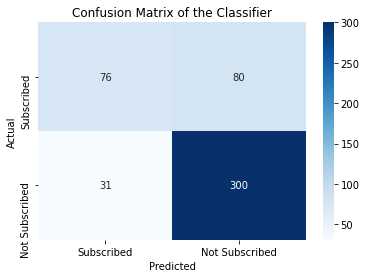

In [35]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Subscribed', 'Not Subscribed'])

#### AUC Score

In [36]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6968


In [37]:
# zipping each feature name to its coefficient
logreg_model_values = zip(meals[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -2.76)
('Mobile_number', 0.9)
('Cancellations_before_noon', 0.29)
('Tastes_and_preferences', 0.34)
('Refrigerated_locker', 0.55)
('Early_deliveries', 0.06)
('personal', 1.32)
('professional', 1.89)
('Male', 0.33)
('Female', -0.69)
('has_number_of_names_above_1', 1.15)


### Tuned Logistic 

In [38]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7601
Testing  ACCURACY: 0.7721
AUC Score        : 0.6968


#### RandomizedSearchCV 

In [39]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 250)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 50,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(meals_origin, meals_response)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<ipython-input-39-2fff9e96e5a9>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  C_space          = pd.np.arange(0.1, 5.0, 0.1)


Tuned Parameters  : {'warm_start': False, 'solver': 'sag', 'C': 1.4000000000000001}
Tuned CV AUC      : 0.6865


In [40]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=1.4000000000000001, max_iter=250, random_state=219,
                   solver='sag')

In [41]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7635
Testing  ACCURACY: 0.7782
AUC Score        : 0.7064


In [42]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 79
False Positives: 77
False Negatives: 31
True Positives : 300



In [43]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}    {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR      {lr_tuned_auc}        {lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned LR'],
           
    'AUC Score'     : [logreg_auc_score, lr_tuned_auc],
    
    'Training Accuracy' : [logreg_train_score, lr_tuned_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, lr_tuned_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6968    (76, 80, 31, 300)
Tuned LR      0.7064        (79, 77, 31, 300)




In [44]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6968,0.7601,0.7721,"(76, 80, 31, 300)"
1,Tuned LR,0.7064,0.7635,0.7782,"(79, 77, 31, 300)"
2,Tuned LR,0.7064,0.7635,0.7782,"(79, 77, 31, 300)"


## Display Tree

In [45]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img




### Full Tree

In [46]:
# train/test split with the Full model
meals_origin   =  meals.loc[ : , candidate_dict['logit_sig_2']]
meals_response =  meals.loc[ : , 'Cross_sell_success']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            meals_origin,
            meals_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = meals_response)


In [47]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy

# displaying and saving the gap between training and testing
print('Full Tree Train-Test Gap :', abs(full_tree_train_score - full_tree_test_score).round(4))
full_tree_test_gap = abs(full_tree_train_score - full_tree_test_score).round(4)

# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8595
Full Tree Testing ACCURACY : 0.7023
Full Tree AUC Score: 0.6708
Full Tree Train-Test Gap : 0.1572


In [48]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 91
False Positives: 65
False Negatives: 80
True Positives : 251



### Pruned Tree

In [49]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 5,
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy

# displaying and saving the gap between training and testing
print('Pruned Tree Train-Test Gap :', abs(pruned_tree_train_score - pruned_tree_test_score).round(4))
pruned_tree_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pred).round(4) # auc

Training ACCURACY: 0.756
Testing  ACCURACY: 0.7844
AUC Score        : 0.7262
Pruned Tree Train-Test Gap : 0.0284


In [50]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 88
False Positives: 68
False Negatives: 37
True Positives : 294



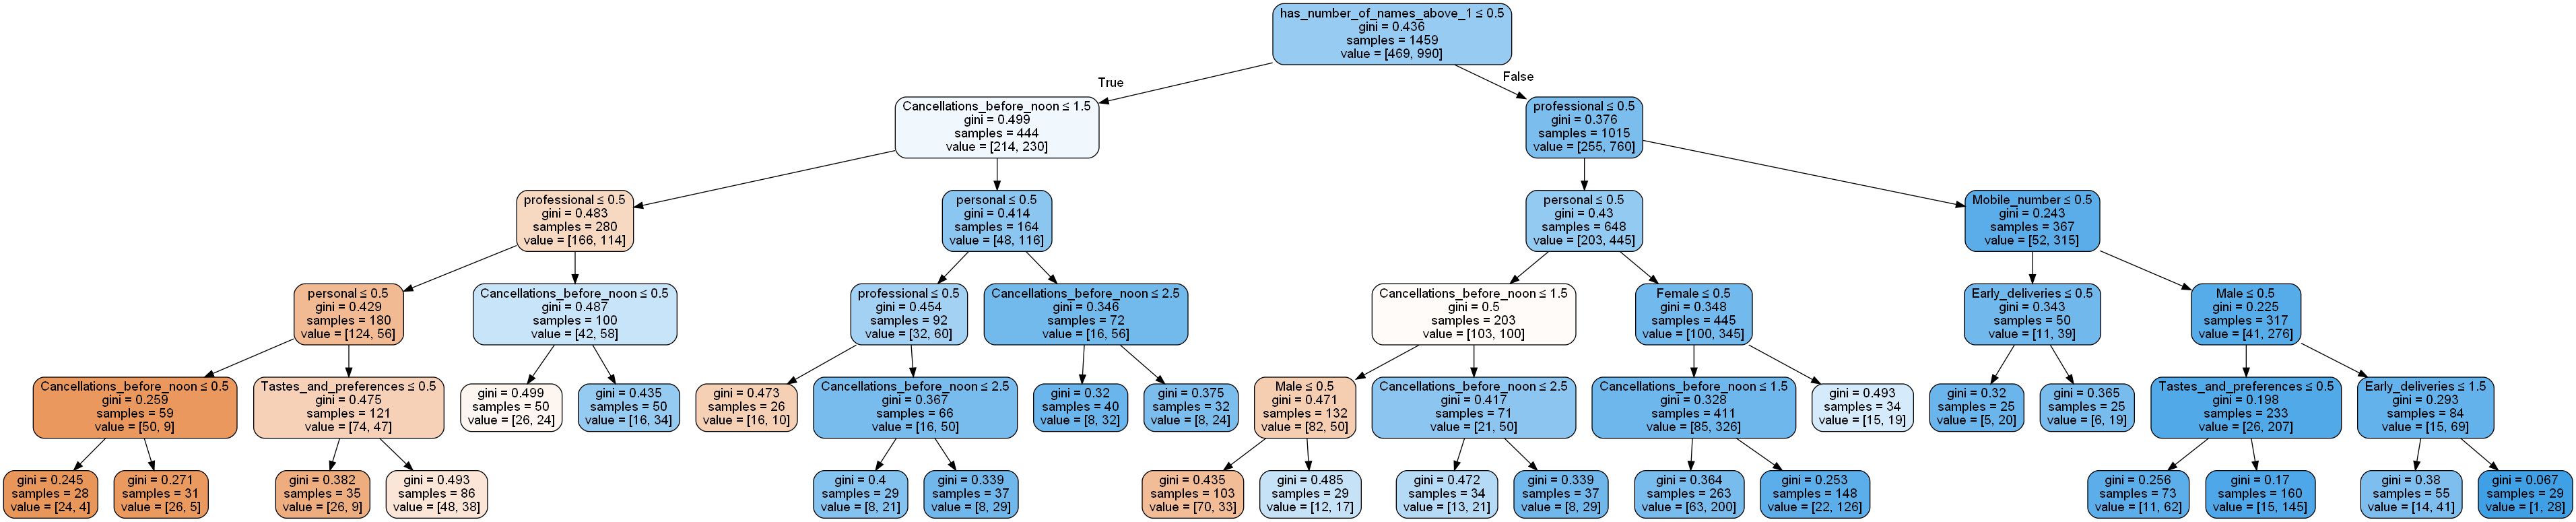

In [51]:
# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = x_train)

<ipython-input-21-141a9830ad1b>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


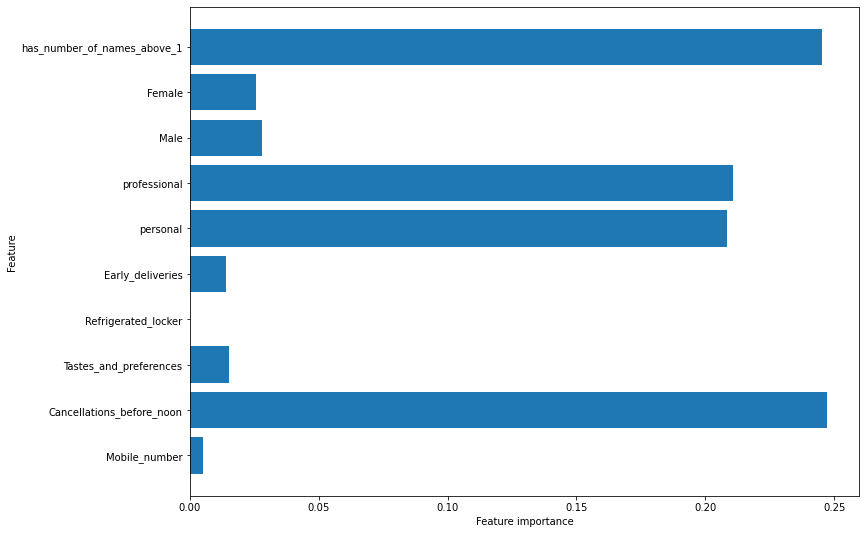

In [52]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train  = x_train,
                         export = False)

In [53]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR      {lr_auc}                    {lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Full Tree     {full_tree_auc_score}       {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}     {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned LR','Full Tree', 'Pruned Tree'],
           
    'AUC Score'     : [logreg_auc_score, lr_auc, full_tree_auc_score, 
                       pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, lr_train_acc, full_tree_train_score,
                           pruned_tree_train_score ],
           
    'Testing Accuracy'  : [logreg_test_score, lr_test_acc, full_tree_test_score,
                           pruned_tree_test_score, ],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6968         (76, 80, 31, 300)
Tuned LR      0.7064                    (79, 77, 31, 300)
Full Tree     0.6708       (91, 65, 80, 251)
Pruned Tree   0.7262     (88, 68, 37, 294)




### Tuned Tree

In [54]:
# declaring a hyperparameter space
criterion_space = ['gini']
splitter_space  = ['random']
depth_space     = pd.np.arange(7)
leaf_space      = pd.np.arange(1, 31, 3)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 150,
                                   n_jobs                = -1,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(meals_origin, meals_response)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-54-9c058a2a42d7>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(7)
<ipython-input-54-9c058a2a42d7>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 31, 3)
C:\Users\uwaks\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 70 is smaller than n_iter=150. Running 70 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 7, 'max_depth': 6, 'criterion': 'gini'}
Tuned Training AUC: 0.6883


In [55]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7539
Testing  ACCURACY: 0.7618
AUC Score        : 0.696


In [56]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 80
False Positives: 76
False Negatives: 40
True Positives : 291



In [57]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6968,0.7601,0.7721,"(76, 80, 31, 300)"
1,Tuned LR,0.7064,0.7635,0.7782,"(79, 77, 31, 300)"
2,Full Tree,0.6708,0.8595,0.7023,"(91, 65, 80, 251)"
3,Pruned Tree,0.7262,0.7560,0.7844,"(88, 68, 37, 294)"
4,Tuned Tree,0.6960,0.7539,0.7618,"(80, 76, 40, 291)"


## Random Forest

### Base Random Forest

In [58]:
# train/test split with the logit_full variables
meals_data   =  meals.loc[ : , candidate_dict ['x_variables']]
meals_target =  meals.loc[ :, 'Cross_sell_success']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            meals_data,
            meals_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = meals_target)

In [59]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [60]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))

rf_default_train = rf_default_fit.score(x_train, y_train).round(4)
rf_default_test = rf_default_fit.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('Train-Test Gap   :', abs(rf_default_train - rf_default_test).round(4))
rf_default_test_gap = abs(rf_default_train - rf_default_test).round(4)


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7495
Train-Test Gap   : 0.2505
AUC Score        : 0.6463


<ipython-input-21-141a9830ad1b>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


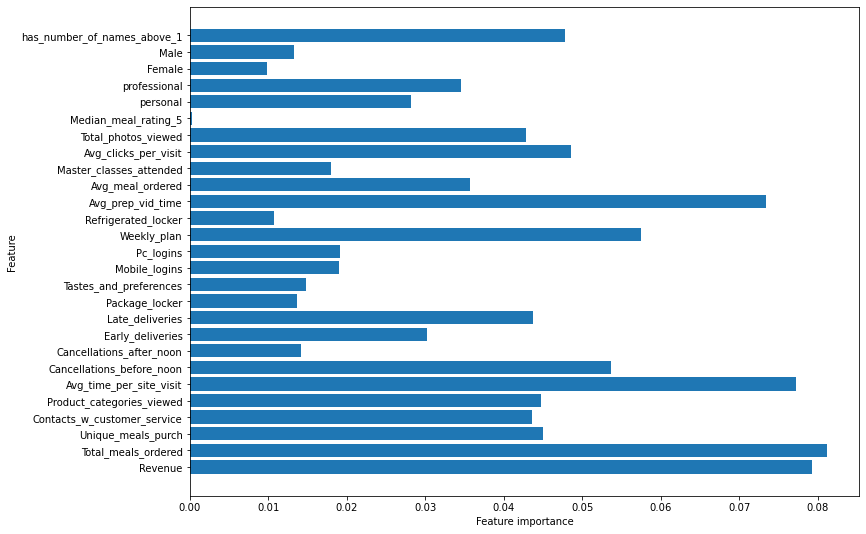

In [61]:
# plotting feature importances
plot_feature_importances(model = rf_default_fit,
                        train = x_train,
                        export = False)

In [62]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 56
False Positives: 100
False Negatives: 22
True Positives : 309



In [63]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6968,0.7601,0.7721,"(76, 80, 31, 300)"
1,Tuned LR,0.7064,0.7635,0.7782,"(79, 77, 31, 300)"
2,Full Tree,0.6708,0.8595,0.7023,"(91, 65, 80, 251)"
3,Pruned Tree,0.7262,0.7560,0.7844,"(88, 68, 37, 294)"
4,Tuned Tree,0.6960,0.7539,0.7618,"(80, 76, 40, 291)"
5,Random Forest (full),0.6463,1.0000,0.7495,"(56, 100, 22, 309)"


### Tuned Random Forest

In [64]:
#Declaring variables
meals_data   =  meals.loc[ : , candidate_dict['logit_full']]
meals_target =  meals.loc[ : , 'Cross_sell_success']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            meals_data,
            meals_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = meals_response)


# merging training data for statsmodels
meals_train = pd.concat([x_train, y_train], axis = 1)


In [65]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(1000)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini']
bootstrap_space  = [False]
warm_start_space = [True]
depth_space      = pd.np.arange(5)

# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space,
              'max_depth'        : depth_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 10,
                               n_jobs     = -1,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(meals_data, meals_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

<ipython-input-65-931fc288ec44>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space  = pd.np.arange(1000)
<ipython-input-65-931fc288ec44>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space       = pd.np.arange(1, 31, 10)
<ipython-input-65-931fc288ec44>:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space      = pd.np.arange(5)


Tuned Parameters  : {'warm_start': True, 'n_estimators': 707, 'min_samples_leaf': 11, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.5544


In [66]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=11,
                       n_estimators=707, random_state=219, warm_start=True)

In [67]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = forest_cv.best_estimator_


# FIT step not needed


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7162
Forest Tuned Testing  ACCURACY: 0.7207
Forest Tuned AUC Score        : 0.5709


<ipython-input-21-141a9830ad1b>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


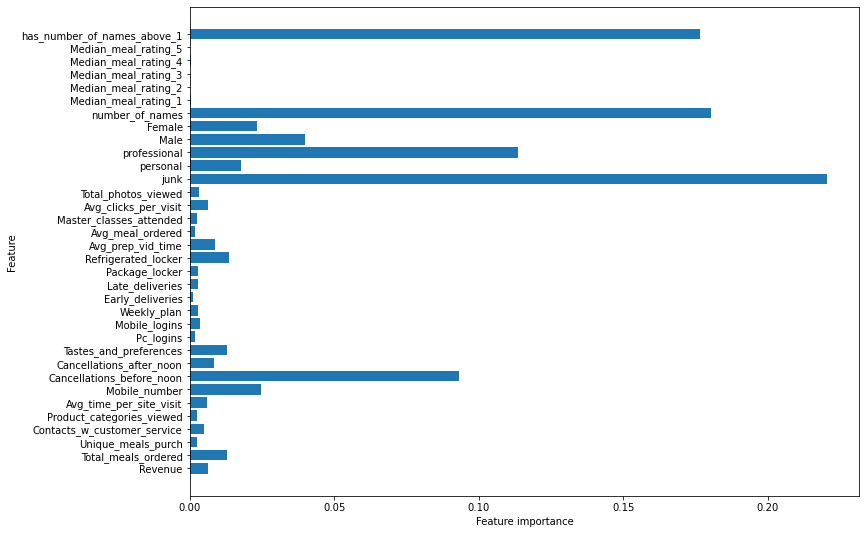

In [68]:
# plotting feature importances
plot_feature_importances(forest_tuned,
                         train = x_train,
                         export = False)

In [69]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 24
False Positives: 132
False Negatives: 4
True Positives : 327



In [70]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6968,0.7601,0.7721,"(76, 80, 31, 300)"
1,Tuned LR,0.7064,0.7635,0.7782,"(79, 77, 31, 300)"
2,Full Tree,0.6708,0.8595,0.7023,"(91, 65, 80, 251)"
3,Pruned Tree,0.7262,0.7560,0.7844,"(88, 68, 37, 294)"
4,Tuned Tree,0.6960,0.7539,0.7618,"(80, 76, 40, 291)"
5,Random Forest (full),0.6463,1.0000,0.7495,"(56, 100, 22, 309)"
6,Tuned Random Forest (Full),0.5709,0.7162,0.7207,"(24, 132, 4, 327)"


## Gradient Boosting Model(GBM)

### GBM Base

In [71]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8389
Testing ACCURACY : 0.7618
AUC Score        : 0.6807


In [72]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 71
False Positives: 85
False Negatives: 31
True Positives : 300



In [73]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6968,0.7601,0.7721,"(76, 80, 31, 300)"
1,Tuned LR,0.7064,0.7635,0.7782,"(79, 77, 31, 300)"
2,Full Tree,0.6708,0.8595,0.7023,"(91, 65, 80, 251)"
3,Pruned Tree,0.7262,0.7560,0.7844,"(88, 68, 37, 294)"
4,Tuned Tree,0.6960,0.7539,0.7618,"(80, 76, 40, 291)"
5,Random Forest (full),0.6463,1.0000,0.7495,"(56, 100, 22, 309)"
6,Tuned Random Forest (Full),0.5709,0.7162,0.7207,"(24, 132, 4, 327)"
7,GBM (Full),0.6807,0.8389,0.7618,"(71, 85, 31, 300)"


### GBM Tuned

In [74]:
#Declaring variables
meals_data   =  meals.loc[ : , candidate_dict['x_variables']]
meals_target =  meals.loc[ : , 'Cross_sell_success']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            meals_data,
            meals_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = meals_target)


# merging training data for statsmodels
meals_train = pd.concat([x_train, y_train], axis = 1)


In [75]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 2.0, 0.2)
estimator_space    = pd.np.arange(350)
depth_space        = pd.np.arange(4)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 50,
                            n_jobs             = -1,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(meals_data, meals_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

<ipython-input-75-dcb8507948de>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  learn_space        = pd.np.arange(0.1, 2.0, 0.2)
<ipython-input-75-dcb8507948de>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space    = pd.np.arange(350)
<ipython-input-75-dcb8507948de>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(4)


Tuned Parameters  : {'warm_start': True, 'n_estimators': 118, 'max_depth': 2, 'learning_rate': 0.30000000000000004}
Tuned Training AUC: 0.6558


In [76]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=2,
                           n_estimators=118, random_state=219, warm_start=True)

In [77]:
# INSTANTIATING with best_estimator
gbm_tuned = full_gbm_cv.best_estimator_


# FIT step not needed


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

# saving scoring data for future use
gbm_tuned_train_score = gbm_tuned.score(x_train, y_train).round(4) # accuracy
gbm_tuned_test_score  = gbm_tuned.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
gbm_tuned_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = gbm_tuned_pred).round(4)

Training ACCURACY: 0.8403
Testing  ACCURACY: 0.848
AUC Score        : 0.7882


In [78]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 97
False Positives: 59
False Negatives: 15
True Positives : 316



### Feature Importance

<ipython-input-21-141a9830ad1b>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


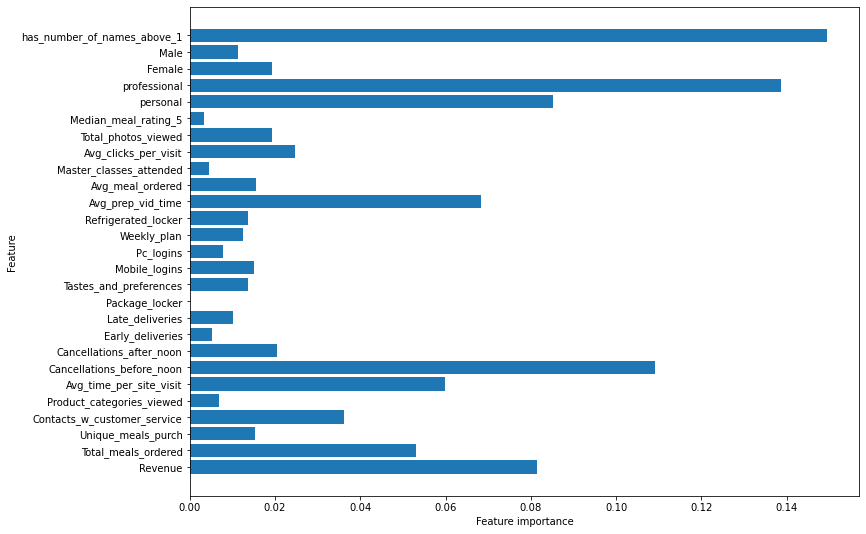

In [79]:
# plotting feature importances
plot_feature_importances(gbm_tuned,
                         train = x_train,
                         export = False)

In [80]:
# declaring model performance objects
gbm_train_acc = gbm_tuned.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM (Final Model)',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6968,0.7601,0.7721,"(76, 80, 31, 300)"
1,Tuned LR,0.7064,0.7635,0.7782,"(79, 77, 31, 300)"
2,Full Tree,0.6708,0.8595,0.7023,"(91, 65, 80, 251)"
3,Pruned Tree,0.7262,0.7560,0.7844,"(88, 68, 37, 294)"
4,Tuned Tree,0.6960,0.7539,0.7618,"(80, 76, 40, 291)"
5,Random Forest (full),0.6463,1.0000,0.7495,"(56, 100, 22, 309)"
6,Tuned Random Forest (Full),0.5709,0.7162,0.7207,"(24, 132, 4, 327)"
7,GBM (Full),0.6807,0.8389,0.7618,"(71, 85, 31, 300)"
8,Tuned GBM (Final Model),0.7882,0.8403,0.8480,"(97, 59, 15, 316)"


In [81]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
8,Tuned GBM (Final Model),0.7882,0.8403,0.8480,"(97, 59, 15, 316)"
3,Pruned Tree,0.7262,0.7560,0.7844,"(88, 68, 37, 294)"
1,Tuned LR,0.7064,0.7635,0.7782,"(79, 77, 31, 300)"
0,Logistic,0.6968,0.7601,0.7721,"(76, 80, 31, 300)"
4,Tuned Tree,0.6960,0.7539,0.7618,"(80, 76, 40, 291)"
7,GBM (Full),0.6807,0.8389,0.7618,"(71, 85, 31, 300)"
2,Full Tree,0.6708,0.8595,0.7023,"(91, 65, 80, 251)"
5,Random Forest (full),0.6463,1.0000,0.7495,"(56, 100, 22, 309)"
6,Tuned Random Forest (Full),0.5709,0.7162,0.7207,"(24, 132, 4, 327)"


## Model Output

In [82]:
# Model Output
print(f"""
Model       Training Accuracy     Testing Accuracy      AUC Score       TN, FP, FN, TP
-----       --------------        ----------------      ----------      --------------
Logistic         {logreg_train_score}           {logreg_test_score}                {logreg_auc_score}          {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR         {lr_tuned_train_score}           {lr_tuned_test_score}                {lr_tuned_auc}          {lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Full Tree        {full_tree_train_score}           {full_tree_test_score}                {full_tree_auc_score}          {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree      {pruned_tree_train_score}            {pruned_tree_test_score}                {pruned_tree_auc_score}          {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
GBM Tuned(Final) {gbm_tuned_train_score}           {gbm_tuned_test_score}                 {gbm_tuned_auc_score}          {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned LR','Full Tree', 'Pruned Tree','GBM Tuned'],
           
    'AUC Score'     : [logreg_auc_score, lr_tuned_auc, full_tree_auc_score, 
                       pruned_tree_auc_score, gbm_tuned_auc_score ],
    
    'Training Accuracy' : [logreg_train_score, lr_tuned_train_score, full_tree_train_score,
                           pruned_tree_train_score, gbm_tuned_train_score ],
           
    'Testing Accuracy'  : [logreg_test_score, lr_tuned_test_score, full_tree_test_score,
                           pruned_tree_test_score, gbm_tuned_test_score ],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp)]}




Model       Training Accuracy     Testing Accuracy      AUC Score       TN, FP, FN, TP
-----       --------------        ----------------      ----------      --------------
Logistic         0.7601           0.7721                0.6968          (76, 80, 31, 300)
Tuned LR         0.7635           0.7782                0.7064          (79, 77, 31, 300)
Full Tree        0.8595           0.7023                0.6708          (91, 65, 80, 251)
Pruned Tree      0.756            0.7844                0.7262          (88, 68, 37, 294)
GBM Tuned(Final) 0.8403           0.848                 0.7882          (97, 59, 15, 316)

